In [1]:
#Data Wrangling for book recommendation system to be used by Kindle or Goodreads

In [1]:
#import pandas, matplotlib.pyplot, seaborn, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [2]:
#load data file
file = 'GoodReads_100k_books.csv'
book_data= pd.read_csv(file)

In [3]:
#call info on book_data
book_data.info

<bound method DataFrame.info of                                                   author bookformat  \
0                                   Laurence M. Hauptman  Hardcover   
1                       Charlotte Fiell,Emmanuelle Dirix  Paperback   
2                                          Andy Anderson  Paperback   
3                                   Carlotta R. Anderson  Hardcover   
4                                          Jean Leveille        NaN   
...                                                  ...        ...   
99995                                         Simon Monk      ebook   
99996  Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...  Hardcover   
99997                                     C. John Miller  Paperback   
99998                                      Albert Marrin  Hardcover   
99999                                      Marc E. Fitch      ebook   

                                                    desc  \
0      Reveals that several hundred thousand Indians ..

In [4]:
#look at the head of the file
book_data.head(3)

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26


In [5]:
#review relevance of columns for recommendations. Keep Author, Genre, desc, Rating, Title, total ratings and link
book_rategen = book_data.drop(columns= ['bookformat','img','pages','reviews','isbn','isbn13'])
book_rategen.head(3)

,author,desc,genre,link,rating,title,totalratings
0,Laurence M. Hauptman,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://goodreads.com/book/show/1001053.Betwee...,3.52,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://goodreads.com/book/show/10010552-fashi...,4.51,Fashion Sourcebook 1920s,41
2,Andy Anderson,The seminal history and analysis of the Hungar...,"Politics,History",https://goodreads.com/book/show/1001077.Hungar...,4.15,Hungary 56,26


In [6]:
#reorder columns
book_rategen=book_rategen[['title', 'author', 'desc', 'genre', 'rating', 'totalratings', 'link']]
book_rategen.head(3)

,title,author,desc,genre,rating,totalratings,link
0,Between Two Fires: American Indians in the Civ...,Laurence M. Hauptman,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",3.52,33,https://goodreads.com/book/show/1001053.Betwee...
1,Fashion Sourcebook 1920s,"Charlotte Fiell,Emmanuelle Dirix",Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",4.51,41,https://goodreads.com/book/show/10010552-fashi...
2,Hungary 56,Andy Anderson,The seminal history and analysis of the Hungar...,"Politics,History",4.15,26,https://goodreads.com/book/show/1001077.Hungar...


In [7]:
#count and order missing data and datatype
missing_data= pd.concat([book_rategen.isnull().sum(), 100* book_rategen.isnull().mean()], axis=1)
missing_data.columns= ['count', '%']
missing_data.sort_values(by='count')

,count,%
author,0,0.000
rating,0,0.000
totalratings,0,0.000
link,0,0.000
title,1,0.001
desc,6772,6.772
genre,10467,10.467


In [8]:
#review data types
book_rategen.dtypes

title            object
author           object
desc             object
genre            object
rating          float64
totalratings      int64
link             object
dtype: object

In [9]:
#drop blank title 
book_rategen=book_rategen.dropna(subset=['title'])


In [10]:
#review for more missing data
missing_data2= book_rategen.isnull().sum()
print(missing_data2)

title               0
author              0
desc             6771
genre           10467
rating              0
totalratings        0
link                0
dtype: int64


In [11]:
#fill missing values
book_rategen.fillna(value='Not Provided', inplace=True)
print(book_rategen.isnull().sum())

title           0
author          0
desc            0
genre           0
rating          0
totalratings    0
link            0
dtype: int64


In [12]:
book_rategen['title'].value_counts().head()

title
Love in the Mask    32
Selected Poems      22
Cinderella          13
Redemption          11
Coming Home         11
Name: count, dtype: int64

In [13]:
book_rategen.describe()

,rating,totalratings
count,99999.000000,9.999900e+04
mean,3.833060,2.990794e+03
std,0.621239,3.635356e+04
min,0.000000,0.000000e+00
25%,3.660000,3.100000e+01
50%,3.910000,1.460000e+02
75%,4.140000,7.440000e+02
max,5.000000,3.819326e+06


In [14]:
book_rategen[['title','author']].nunique

<bound method DataFrame.nunique of                                                    title  \
0      Between Two Fires: American Indians in the Civ...   
1                               Fashion Sourcebook 1920s   
2                                             Hungary 56   
3      All-American Anarchist: Joseph A. Labadie and ...   
4                                  Les oiseaux gourmands   
...                                                  ...   
99995  Make Your Own PCBs with Eagle: From Schematic ...   
99996       Horngren's Financial & Managerial Accounting   
99997  A Faith Worth Sharing: A Lifetime of Conversat...   
99998  A Volcano Beneath the Snow: John Brown's War A...   
99999  Paranormal Nation: Why America Needs Ghosts, U...   

                                                  author  
0                                   Laurence M. Hauptman  
1                       Charlotte Fiell,Emmanuelle Dirix  
2                                          Andy Anderson  
3       

In [15]:
#want to look at multiple entries with the same title, check if they have the same author
#groupby may be a good choice
groupedtitle = book_rategen.groupby(['title', 'author'])
groupedtitle.first()

,,desc,genre,rating,totalratings,link
title,author,,,,,
"""Any Grooming Hints for Your Fans, Rollie?""",G.B. Trudeau,Not Provided,"Humor,Sequential Art,Comics,Sequential Art,Car...",4.00,77,https://goodreads.com/book/show/1118756._Any_G...
"""Daisuki.""",Hildred Billings,Aiko and Reina have been together for almost 2...,"LGBT,Lesbian,Adult Fiction,Erotica,LGBT,Adult,...",3.77,73,https://goodreads.com/book/show/17183771-daisuki
"""Dark Pictures"" and Other Stories",Hiroshi Noma,The short stories that Noma Hiroshi produced i...,"Asian Literature,Japanese Literature,Fiction,C...",3.60,10,https://goodreads.com/book/show/1128118._Dark_...
"""Defects"": Engendering the Modern Body","Helen Elizabeth Deutsch,Helen Elizabeth Deutsch","""Defects"", brings together essays on the emerg...",Disability,4.50,4,https://goodreads.com/book/show/1304197._Defects_
"""Financial Times"" Mastering Marketing",Tim Dickson,The ultimate book for anyone involved or belie...,Not Provided,3.00,5,https://goodreads.com/book/show/1606558._Finan...
...,...,...,...,...,...,...
íí‹°ë³´ì´ 7,Mi-Ri Hwang,Not Provided,"Sequential Art,Manga,Manga,Manhwa,Romance,Mang...",3.87,134,https://goodreads.com/book/show/11513269-7
íí‹°ë³´ì´ 8,Mi-Ri Hwang,Not Provided,"Sequential Art,Manga,Manga,Manhwa,Romance,Mang...",3.87,133,https://goodreads.com/book/show/11513302-8
í•˜ë°±ì˜ ì‹ ë¶€ 14,Mi-Kyung Yun,í•˜ë°±ì€ ë¬´ë¦¬ì˜ í¬ìƒìœ¼ë¡œ ì¸ê°„ì—ê²Œ ...,"Sequential Art,Manga,Manga,Manhwa,Romance,Fant...",3.95,432,https://goodreads.com/book/show/13559010-14


In [17]:
#only one missing title, up to 10% missing genre which is ok
#investigate features and do correlations 

In [16]:
#checking variables
book_rategen['totalratings'].describe()


count    9.999900e+04
mean     2.990794e+03
std      3.635356e+04
min      0.000000e+00
25%      3.100000e+01
50%      1.460000e+02
75%      7.440000e+02
max      3.819326e+06
Name: totalratings, dtype: float64

In [17]:
book_rategen['rating'].describe()

count    99999.000000
mean         3.833060
std          0.621239
min          0.000000
25%          3.660000
50%          3.910000
75%          4.140000
max          5.000000
Name: rating, dtype: float64

In [18]:
book_rategen.totalratings.value_counts()

totalratings
1         1797
0         1562
2         1548
3         1305
4         1184
          ... 
6561         1
233585       1
4825         1
14879        1
11462        1
Name: count, Length: 10536, dtype: int64

In [19]:
book_rategen.rating.value_counts()

rating
4.00    3621
0.00    1562
3.67    1248
3.75    1224
3.80    1186
        ... 
2.52       1
2.39       1
2.31       1
4.95       1
1.68       1
Name: count, Length: 289, dtype: int64

In [20]:
#corralation of the numerical data we have
book_rategen['totalratings'].corr(book_rategen['rating'])

0.025135114601296787

C:\Users\hmkfs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


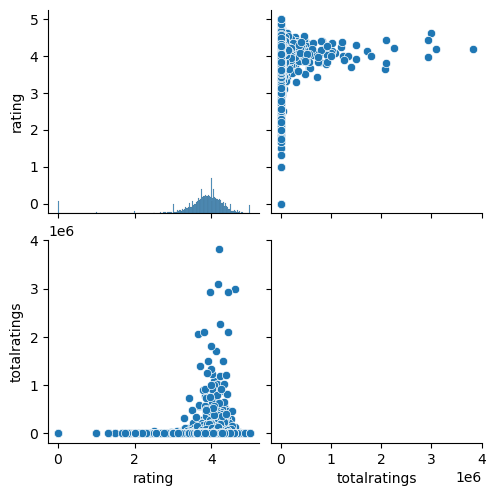

In [21]:
sns.pairplot(book_rategen)

<Axes: xlabel='rating', ylabel='totalratings'>

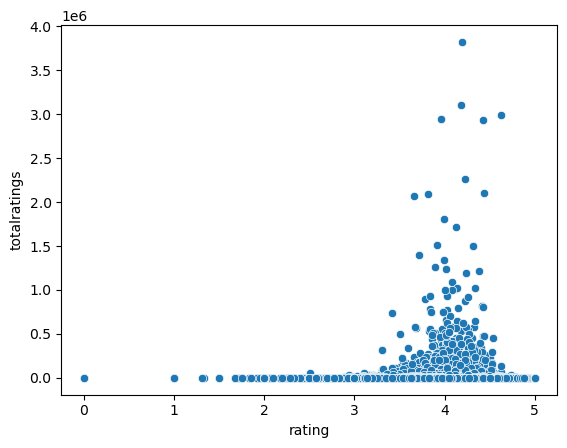

In [22]:
sns.scatterplot(data=book_rategen, x='rating', y='totalratings')

<Axes: xlabel='rating', ylabel='totalratings'>

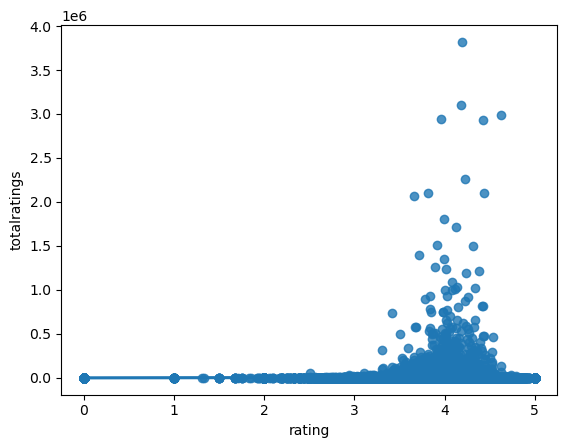

In [23]:
sns.regplot(data=book_rategen, x='rating', y='totalratings')

In [24]:
#looks like we may need top clean up those low ratings
low_ratings=book_rategen.rating.sort_values()
print(low_ratings)
print(low_ratings.value_counts())

94628    0.0
93541    0.0
73234    0.0
73221    0.0
93528    0.0
        ... 
39241    5.0
81251    5.0
53055    5.0
72989    5.0
68785    5.0
Name: rating, Length: 99999, dtype: float64
rating
4.00    3621
0.00    1562
3.67    1248
3.75    1224
3.80    1186
        ... 
2.30       1
2.31       1
2.36       1
2.37       1
2.52       1
Name: count, Length: 289, dtype: int64


In [25]:
no_ratings=book_rategen.totalratings.sort_values()
print(no_ratings.value_counts())
print(no_ratings)

totalratings
1          1797
0          1562
2          1548
3          1305
4          1184
           ... 
8915          1
8910          1
8909          1
8907          1
3819326       1
Name: count, Length: 10536, dtype: int64
33485          0
39833          0
39717          0
71899          0
17832          0
          ...   
81236    2934616
94942    2938072
57742    2984351
49695    3099689
27180    3819326
Name: totalratings, Length: 99999, dtype: int64


In [26]:
#remove rating of 0
only_ratings=book_rategen.drop(book_rategen[(book_rategen.rating < 1)].index)

In [27]:
#remove not ratings
only_ratings=only_ratings.drop(only_ratings[(only_ratings.totalratings<1)].index)

In [28]:
ratingreview=only_ratings.rating.sort_values()
print(ratingreview)

13022    1.0
65182    1.0
70246    1.0
11190    1.0
73507    1.0
        ... 
91325    5.0
67379    5.0
3902     5.0
69249    5.0
93101    5.0
Name: rating, Length: 98437, dtype: float64


In [29]:
ratingreview=only_ratings.totalratings.sort_values()
print(ratingreview)

72989          1
29663          1
6742           1
80353          1
80363          1
          ...   
81236    2934616
94942    2938072
57742    2984351
49695    3099689
27180    3819326
Name: totalratings, Length: 98437, dtype: int64


In [30]:
#rerun above correlations with the adjusted data
only_ratings['totalratings'].corr(only_ratings['rating'])

0.027146966191135366

C:\Users\hmkfs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


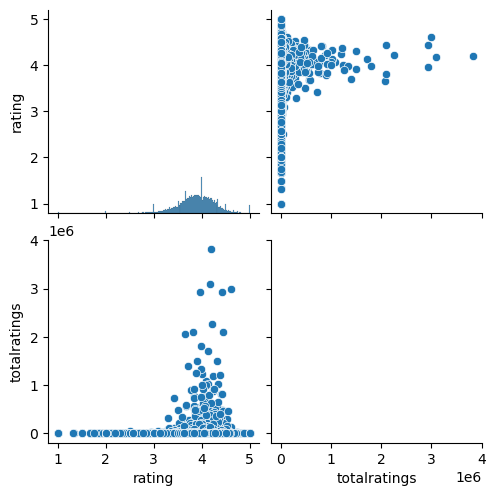

In [31]:
sns.pairplot(only_ratings)

<Axes: xlabel='rating', ylabel='totalratings'>

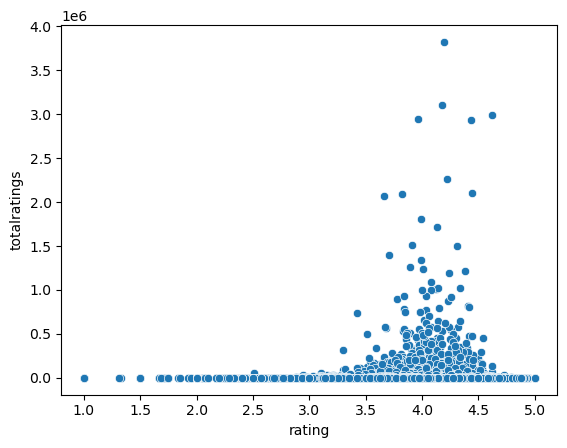

In [32]:
sns.scatterplot(data=only_ratings, x='rating', y='totalratings')

<Axes: xlabel='rating', ylabel='totalratings'>

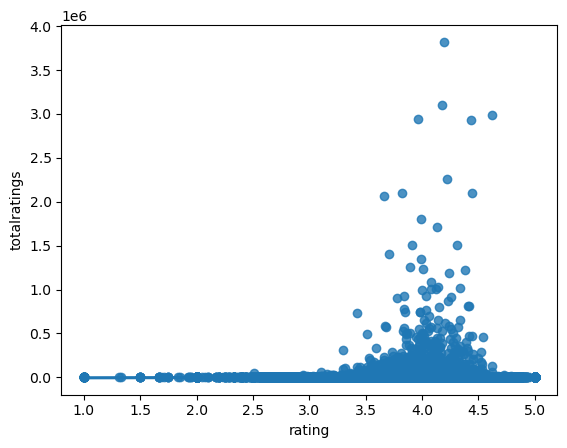

In [33]:
sns.regplot(data=only_ratings, x='rating', y='totalratings')

C:\Users\hmkfs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


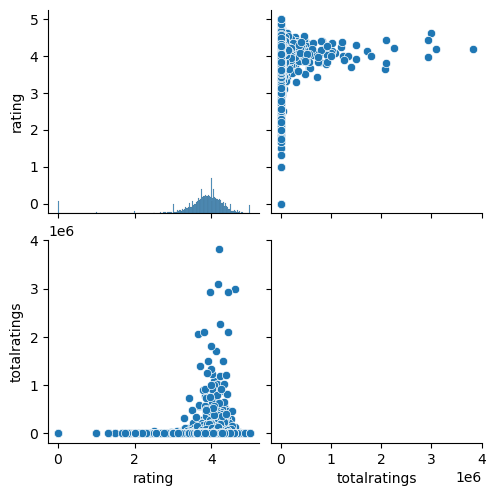

In [34]:
#review any other possible corralations
sns.pairplot(book_rategen)

In [35]:
#preprocessing and data training
book_rategen['genre']=book_rategen['genre'].str.replace('[^a-zA-Z]',' ')
book_rategen['genre']=book_rategen['genre'].str.lower()

from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(min_df=0.1, max_df=1.0)
cv.fit(book_rategen['genre'])
print(cv.get_feature_names_out())


['adult' 'art' 'cultural' 'fantasy' 'fiction' 'historical' 'history'
 'literature' 'nonfiction' 'not' 'provided' 'romance' 'science']


In [36]:
cv_transformed=cv.transform(book_rategen['genre'])
cv_array=cv_transformed.toarray()
print(cv_array.shape)

(99999, 13)


In [37]:
dummy=pd.get_dummies(book_rategen['genre'])
dummy.head()

,40k,"40k,audiobook","40k,fantasy,science fiction","40k,fiction,science fiction,fantasy","40k,games,gaming,science fiction,sports and games,games,games,role playing games","40k,science fiction","40k,science fiction,anthologies,fiction,short stories","40k,science fiction,fantasy","40k,science fiction,fantasy,anthologies,fiction","40k,science fiction,fantasy,fiction",...,"young adult,womens fiction,chick lit,fiction,romance,contemporary,young adult,teen,young adult,high school,childrens,middle grade,drama,childrens","young adult,womens fiction,chick lit,fiction,romance,young adult,teen,contemporary,young adult,high school,childrens,middle grade,realistic fiction,young adult,young adult contemporary","young adult,womens fiction,chick lit,fiction,romance,young adult,teen,contemporary,young adult,high school,childrens,middle grade,young adult,young adult contemporary,childrens","young adult,womens fiction,chick lit,fiction,young adult,teen,romance,contemporary,young adult,high school,childrens,middle grade,childrens,love","young adult,womens fiction,chick lit,romance,fiction,new york,contemporary,childrens,middle grade,young adult,teen,young adult,high school","young adult,world war ii,holocaust,war,historical,historical fiction,childrens,historical","young adult,young adult paranormal,young adult","young adult,young adult,coming of age,travel,road trip,realistic fiction,humor,cultural,contemporary","young adult,young adult,high school,romance,contemporary,realistic fiction,sociology,abuse,romance,m f romance,young adult,teen,fiction","young adult,young adult,teen,media tie in,tv,fiction,media tie in"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(book_rategen[['rating']])



In [39]:
from sklearn.model_selection import train_test_split

X=book_rategen['rating']
y=book_rategen['totalratings']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,test_size=0.25, shuffle=True)

In [40]:
print('X_train : ') 
print(X_train.head()) 
print('') 
print('X_test : ') 
print(X_test.head()) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print('') 
print('y_test : ') 
print(y_test.head())

X_train : 
57881    3.84
27230    4.01
1921     4.17
87573    4.15
97191    4.50
Name: rating, dtype: float64

X_test : 
79668    3.82
83842    3.76
57026    3.67
53130    4.13
32612    3.93
Name: rating, dtype: float64

y_train : 
57881     45
27230    425
1921     441
87573    256
97191      6
Name: totalratings, dtype: int64

y_test : 
79668    102
83842     62
57026    198
53130      8
32612    734
Name: totalratings, dtype: int64


In [41]:
#build models 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import lightgbm
from bayes_opt import BayesianOptimization
from catboost import CatBoostClassifier, cv, Pool

In [42]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Capstone 2 Ideas.docx',
 'Capstone2.ipynb',
 'Dataset',
 'GoodReads_100k_books.csv',
 'Proposal.docx',
 'Proposal.pdf',
 '~$oposal.docx',
 '~$pstone 2 Ideas.docx']

In [43]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
print(X_train.columns)

Index(['rating'], dtype='object')


In [44]:

categorical_features=['rating']

def lgb_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples, min_data_in_leaf):
    params = {
        "objective" : "binary",
        "metric" : "auc", 
        'is_unbalance': True,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : 0.03,
        "subsample_freq" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1
    }
    lgtrain = lightgbm.Dataset(X_train, y_train,categorical_feature=categorical_features)
    cv_result = lightgbm.cv(params,
                       lgtrain,
                       1000,
                       stratified=True,
                       nfold=3)
    return cv_result['valid auc-mean'][-1]

In [45]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (25, 4000),
                                                'max_depth': (5, 63),
                                                'lambda_l2': (0.0, 0.05),
                                                'lambda_l1': (0.0, 0.05),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000)
                                                })

lgbBO.maximize(n_iter=5, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
| 1         | 1.0       | 0.0378    | 0.03014   | 16.05     | 5.233e+03 | 518.0     | 3.242e+03 |
| 2         | 1.0       | 0.03931   | 0.0204    | 47.66     | 4.179e+03 | 1.989e+03 | 1.411e+03 |
| 3         | 1.0       | 0.04104   | 0.02456   | 27.45     | 9.972e+03 | 1.7e+03   | 160.7     |
| 4         | 1.0       | 0.007013  | 0.04784   | 27.44     | 8.213e+03 | 1.863e+03 | 701.6     |
| 5         | 1.0       | 0.04756   | 0.006611  | 31.04     | 8.528e+03 | 845.7     | 2.615e+03 |
| 6         | 1.0       | 0.02592   | 0.03427   | 5.882     | 8.299e+03 | 855.3     | 1.129e+03 |
| 7         | 1.0       | 0.03386   | 0.04237   | 26.01     | 59.62     | 200.8     | 53.42     |


In [46]:
lgbBO.max

{'target': 1.0,
 'params': {'lambda_l1': 0.037800322433738535,
  'lambda_l2': 0.03014256336206604,
  'max_depth': 16.05330511000328,
  'min_child_samples': 5233.02640821425,
  'min_data_in_leaf': 517.9831154253073,
  'num_leaves': 3242.370315407123}}

In [47]:
lgbBO.res[0]

{'target': 1.0,
 'params': {'lambda_l1': 0.037800322433738535,
  'lambda_l2': 0.03014256336206604,
  'max_depth': 16.05330511000328,
  'min_child_samples': 5233.02640821425,
  'min_data_in_leaf': 517.9831154253073,
  'num_leaves': 3242.370315407123}}

In [49]:
#second model
sns.set()
random_seed_number=42
np.random.seed(random_seed_number)

X2=book_rategen.drop('rating', axis=1)
X_train2, X_test2, y_train2, y_test2=train_test_split(X2,y, test_size=0.3, random_state=100)

In [50]:
print(X_train2.head())

                          title                                  author  \
71947                Felt Craft                          Florence Temko   
21641  Third Girl from the Left                        Martha Southgate   
82642    Other People's Baggage  Kendel Lynn,Gigi Pandian,Diane Vallere   
14736                    Gordon                         Edith Templeton   
50978        Shane's Last Stand                       Suzanne Brockmann   

                                                    desc  \
71947                                       Not Provided   
21641  With ,Third Girl from the Left,, Southgate bri...   
82642  Baggage claim can be terminal when a computer ...   
14736  Originally written under a pseudonym, this thr...   
50978  Meet Shane Laughlin, the hero of bestselling a...   

                                                   genre  totalratings  \
71947                                       not provided             0   
21641  fiction,cultural,african american

In [51]:
from sklearn.linear_model import LinearRegression

scaler2 = StandardScaler()
if isinstance(X_train2, pd.DataFrame) and 'totalratings' in X_train2.columns:
    X_train2 = scaler2.fit_transform(X_train2['totalratings'].values.reshape(-1, 1))
if isinstance(X_test2, pd.DataFrame) and 'totalratings' in X_test2.columns:
    X_test2 = scaler2.transform(X_test2['totalratings'].values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train2, y_train2)

predictions = model.predict(X_test2)

In [52]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train2,y_train2)
    
    train_scores.append(knn.score(X_train2,y_train2))
    test_scores.append(knn.score(X_test2,y_test2))

In [53]:
for i in range(len(test_scores)):
    if i == 0:
        print('k\tTrain_scores\tTest_scores')
    print(f'{i+1}\t{train_scores[i]: .5f}\t{test_scores[i]: .5f}')

k	Train_scores	Test_scores
1	 1.00000	 0.92980
2	 0.96350	 0.91133
3	 0.94234	 0.89823
4	 0.92667	 0.88617
5	 0.91804	 0.87987
6	 0.90664	 0.86937
7	 0.90097	 0.86493
8	 0.89174	 0.85707
9	 0.88551	 0.85193


In [54]:
index_max = max(range(len(train_scores)), key=train_scores.__getitem__)
index_max + 1

1

In [55]:
index_max_test = max(range(len(test_scores)), key=test_scores.__getitem__)
index_max_test + 1

1

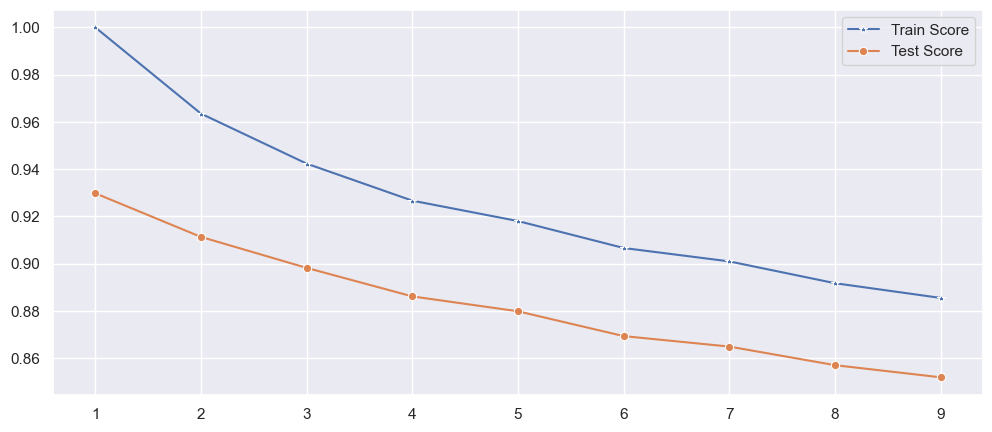

In [56]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1, 10), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 10), y=test_scores, marker='o', label='Test Score')

In [57]:
knn2= KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train2, y_train2)
knn2.score(X_test2, y_test2)

0.9298

In [58]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test2)
pl = confusion_matrix(y_test2,y_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_test2, y_test2, cmap='YlGnBu_r')

MemoryError: 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test2,y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X2,y)

In [ ]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_neighbors':np.arange(1,50)}
rfc = RandomForestClassifier(n_estimators=600)
rfc_cv= GridSearchCV(knn,param_grid,cv=5)
rfc_cv.fit(X2,y)

In [ ]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))